In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\devender bahadur\OneDrive\Innomatics\Projects\Machine Learning\ML Assignment\churn.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x:x.replace(" ","0"))

In [6]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [7]:
df.drop('customerID',axis=1, inplace=True)

In [8]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.shape

(7043, 20)

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Machine Learning Problem Solving

In [13]:
# Identifying the inputs (X) and output (y)

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 
        'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# As our target value(y) includes discrete values in it we will be performing classification task.
# Algorithms that can be used are :
# 1. Neighbour base approach - KNN Classifier
# 2. Boundary base - Logistic regression
# 3. Rule base approach - Decision tree classifier
# 4. Probability approach - Naive base
# 5. Ensemble approach - Bagging(Random Forest) Boosting(XG - Boost/GBDT[grarient boosting decision tree])

In [14]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [15]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Female,0,Yes,Yes,45,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),25.90,1216.60
3927,Male,0,Yes,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.55,51.15
5955,Male,0,Yes,Yes,72,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),68.40,4855.35
6936,Male,0,Yes,Yes,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.15,385.00


In [16]:
y_train

6630     No
7013     No
2224    Yes
6580     No
1501     No
       ... 
79       No
3927    Yes
5955     No
6936    Yes
5640    Yes
Name: Churn, Length: 5282, dtype: object

In [17]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,Male,0,Yes,Yes,19,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.95,1875.55
571,Male,1,No,No,47,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),59.60,2754.00
6368,Male,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.70
25,Female,0,No,No,30,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),55.30,1530.60


In [18]:
y_test

4880     No
1541     No
1289     No
5745     No
4873     No
       ... 
3287    Yes
571      No
6368    Yes
25       No
3368     No
Name: Churn, Length: 1761, dtype: object

In [19]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [20]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,243.65


In [21]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# Converting x_train Catagorical data to numerical data.

In [22]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic)
3927,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
5955,Male,Yes,Yes,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic)
6936,Male,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check


In [23]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


In [24]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,2.289869,-0.669552,0.471732,-0.470089
7013,-0.436706,0.305416,0.957819,0.650454
2224,2.289869,-0.628928,0.395418,-0.463401
6580,-0.436706,0.671028,0.446847,0.680387
1501,-0.436706,-0.791422,-1.479251,-0.900356


# Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [27]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe], axis=1)
X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,2.289869,-0.669552,0.471732,-0.470089,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,-0.436706,0.305416,0.957819,0.650454,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,2.289869,-0.628928,0.395418,-0.463401,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,-0.436706,0.671028,0.446847,0.680387,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.436706,-0.791422,-1.479251,-0.900356,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Working with Test data

In [28]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,0,Yes,No,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,0,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [29]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [30]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4880,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1541,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
5745,Female,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4873,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [31]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,0,50,20.55,1067.65
1541,0,72,19.85,1434.10
1289,0,63,68.80,4111.35
5745,0,61,24.20,1445.20
4873,0,7,19.30,144.95


In [32]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,-0.436706,0.711652,-1.459343,-0.536576
1541,-0.436706,1.605372,-1.482569,-0.374796
1289,-0.436706,1.239759,0.141591,0.807158
5745,-0.436706,1.158512,-1.338236,-0.369895
4873,-0.436706,-1.035164,-1.500818,-0.943930


In [34]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,-0.436706,0.711652,-1.459343,-0.536576,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,-0.436706,1.605372,-1.482569,-0.374796,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,-0.436706,1.239759,0.141591,0.807158,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,-0.436706,1.158512,-1.338236,-0.369895,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-0.436706,-1.035164,-1.500818,-0.943930,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Applying different Algorithms under Classification task

# Logistic Regression

In [35]:
X_train_transformed

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,2.289869,-0.669552,0.471732,-0.470089,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,-0.436706,0.305416,0.957819,0.650454,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,2.289869,-0.628928,0.395418,-0.463401,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,-0.436706,0.671028,0.446847,0.680387,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.436706,-0.791422,-1.479251,-0.900356,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.436706,0.508534,-1.281830,-0.470818,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3927,-0.436706,-1.197659,-1.459343,-0.985341,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5955,-0.436706,1.605372,0.128319,1.135619,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6936,-0.436706,-1.116411,0.518184,-0.837953,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
y_train

6630     No
7013     No
2224    Yes
6580     No
1501     No
       ... 
79       No
3927    Yes
5955     No
6936    Yes
5640    Yes
Name: Churn, Length: 5282, dtype: object

In [37]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [38]:
y_test_pred = regressor.predict(X_test_transformed)

In [39]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.7836456558773425


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [42]:
y_test_pred = decisiontree.predict(X_test_transformed)

In [43]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [44]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.7103918228279387


# Support vector machine

In [45]:
from sklearn.svm import SVC
support_vector = SVC()
support_vector.fit(X_train_transformed, y_train)

SVC()

In [46]:
y_test_pred = support_vector.predict(X_test_transformed)

In [47]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [48]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.7745599091425327


# KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbor = KNeighborsClassifier()
KNeighbor.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [50]:
y_test_pred = KNeighbor.predict(X_test_transformed)

In [51]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [52]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.7524134014764339


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [54]:
y_test_pred = random.predict(X_test_transformed)

In [55]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [56]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.78137421919364


# Creating an dataframe of all the algorithms and their prediction value

In [57]:
classifier = [['Logistic Regression',0.7836456558773425],['Decision Tree',0.7137989778534923],['Support Vector Machine',0.7745599091425327],['KNN Classifier',0.7524134014764339],['Random Forest',0.7847813742191937]]

In [58]:
churn_prediction = pd.DataFrame(classifier,columns=['Name Of The Algorithm','Predictions'])

In [59]:
churn_prediction

,Name Of The Algorithm,Predictions
0,Logistic Regression,0.783646
1,Decision Tree,0.713799
2,Support Vector Machine,0.774560
3,KNN Classifier,0.752413
4,Random Forest,0.784781


# *Conclusion

## We are getting very close values for every Algorithm.Comparing with each other we can see that Decision tree has the smallest value as compared to other Algorithms.

# *EDA on churn_prediction

# 1) Box Plot

C:\Users\devender bahadur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


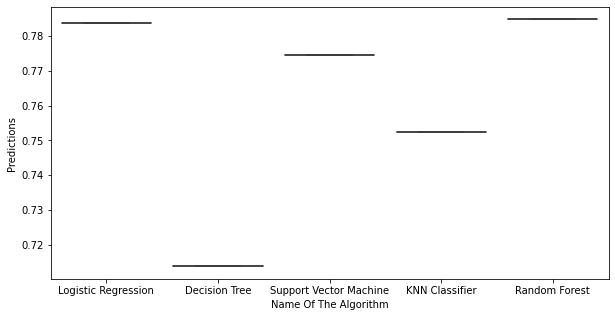

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(churn_prediction["Name Of The Algorithm"],churn_prediction["Predictions"])
plt.show();

# 2) Bar Plot

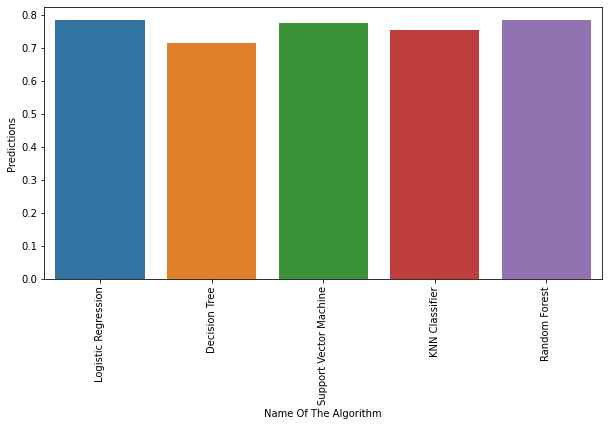

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='Name Of The Algorithm',y='Predictions',data=churn_prediction)
plt.xticks(rotation =90)
plt.show();

In [62]:
churn_prediction

,Name Of The Algorithm,Predictions
0,Logistic Regression,0.783646
1,Decision Tree,0.713799
2,Support Vector Machine,0.774560
3,KNN Classifier,0.752413
4,Random Forest,0.784781


# 3) Scatter Plot

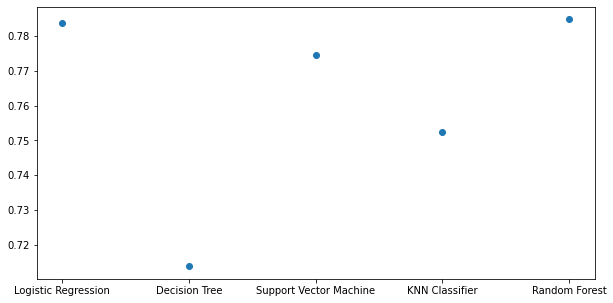

In [63]:
x= ('Logistic Regression','Decision Tree','Support Vector Machine','KNN Classifier','Random Forest')
y= [0.783646,0.713799,0.774560,0.752413,0.784781]
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.show()